In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
league = 'Championship'
if league == 'Premier League':
    id = 91
    df = pd.read_html(f'https://fbref.com/en/comps/9/{league[0]}-{league[1]}-Stats', attrs = {"id" : f"results2023-2024{id}_overall"})[0]
else:
    id = 101
    df = pd.read_html(f'https://fbref.com/en/comps/10/{league}-Stats', attrs = {"id" : f"results2023-2024{id}_overall"})[0]

In [3]:
df_PSxG = pd.read_html(f'https://fbref.com/en/comps/10/{league}-Stats', attrs = {"id" : "stats_squads_keeper_adv_against"})[0]

In [4]:
df_PSxG.columns = ['_'.join(col).strip() for col in df_PSxG.columns.values]

In [5]:
df_PSxG

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Passes_AvgLen,Goal Kicks_Att,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist
0,vs Birmingham City,2,46.0,50,2,2,5,2,50.5,0.28,...,32.4,350,48.3,39.8,505,28,5.5,66,1.43,16.5
1,vs Blackburn,2,46.0,60,0,0,4,1,59.7,0.31,...,33.7,362,47.5,38.4,493,36,7.3,59,1.28,16.6
2,vs Bristol City,1,46.0,53,7,1,9,1,52.1,0.28,...,31.1,359,38.2,33.7,630,36,5.7,93,2.02,16.6
3,vs Cardiff City,3,46.0,53,2,1,17,5,43.4,0.24,...,29.6,331,36.6,33.5,564,32,5.7,66,1.43,17.5
4,vs Coventry City,2,46.0,70,3,2,9,4,62.9,0.32,...,33.7,375,47.7,38.2,674,40,5.9,51,1.11,13.4
5,vs Huddersfield,3,46.0,48,1,0,8,2,43.7,0.27,...,33.4,360,45.0,36.8,712,43,6.0,77,1.67,15.8
6,vs Hull City,2,46.0,68,4,1,9,0,65.8,0.27,...,32.7,353,49.0,40.2,577,31,5.4,77,1.67,16.8
7,vs Ipswich Town,2,46.0,92,2,0,12,4,76.7,0.30,...,34.0,375,49.1,40.3,676,60,8.9,46,1.00,12.9
8,vs Leeds United,3,46.0,81,7,0,7,3,81.1,0.32,...,36.5,385,54.5,41.6,585,19,3.2,49,1.07,15.5
9,vs Leicester City,2,46.0,89,12,1,6,1,89.6,0.34,...,33.0,459,44.0,37.3,601,34,5.7,55,1.20,15.1


In [6]:
df_PSxG = df_PSxG[['Unnamed: 0_level_0_Squad', 'Expected_PSxG', 'Goals_GA', 'Goals_OG']]
df_PSxG.rename(columns={'Unnamed: 0_level_0_Squad': 'Team', 'Expected_PSxG' : 'PSxG', 'Goals_GA':'Goals Scored','Goals_OG':'Own Goals'}, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\1573258572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG.rename(columns={'Unnamed: 0_level_0_Squad': 'Team', 'Expected_PSxG' : 'PSxG', 'Goals_GA':'Goals Scored','Goals_OG':'Own Goals'}, inplace=True)


In [7]:
df_PSxG['Team'] = df_PSxG['Team'].str.split('vs').str[1]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\2568517509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG['Team'] = df_PSxG['Team'].str.split('vs').str[1]


In [8]:
df_PSxG['Team'] = df_PSxG['Team'].str.strip()

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\501252023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG['Team'] = df_PSxG['Team'].str.strip()


In [9]:
df_PSxG['Goals'] = df_PSxG['Goals Scored'] - df_PSxG['Own Goals']

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\3043984228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG['Goals'] = df_PSxG['Goals Scored'] - df_PSxG['Own Goals']


In [10]:
df = df_PSxG
df.drop(columns=['Goals Scored', 'Own Goals'], inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\1270201904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Goals Scored', 'Own Goals'], inplace=True)


In [11]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_11676\198423750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")


In [12]:
df = pd.DataFrame(df)
df

,Team,PSxG,Goals,Badge
0,Birmingham City,50.5,48,C:/Users/George/Documents/Football Analytics/T...
1,Blackburn,59.7,59,C:/Users/George/Documents/Football Analytics/T...
2,Bristol City,52.1,52,C:/Users/George/Documents/Football Analytics/T...
3,Cardiff City,43.4,48,C:/Users/George/Documents/Football Analytics/T...
4,Coventry City,62.9,66,C:/Users/George/Documents/Football Analytics/T...
5,Huddersfield,43.7,46,C:/Users/George/Documents/Football Analytics/T...
6,Hull City,65.8,68,C:/Users/George/Documents/Football Analytics/T...
7,Ipswich Town,76.7,88,C:/Users/George/Documents/Football Analytics/T...
8,Leeds United,81.1,78,C:/Users/George/Documents/Football Analytics/T...
9,Leicester City,89.6,88,C:/Users/George/Documents/Football Analytics/T...


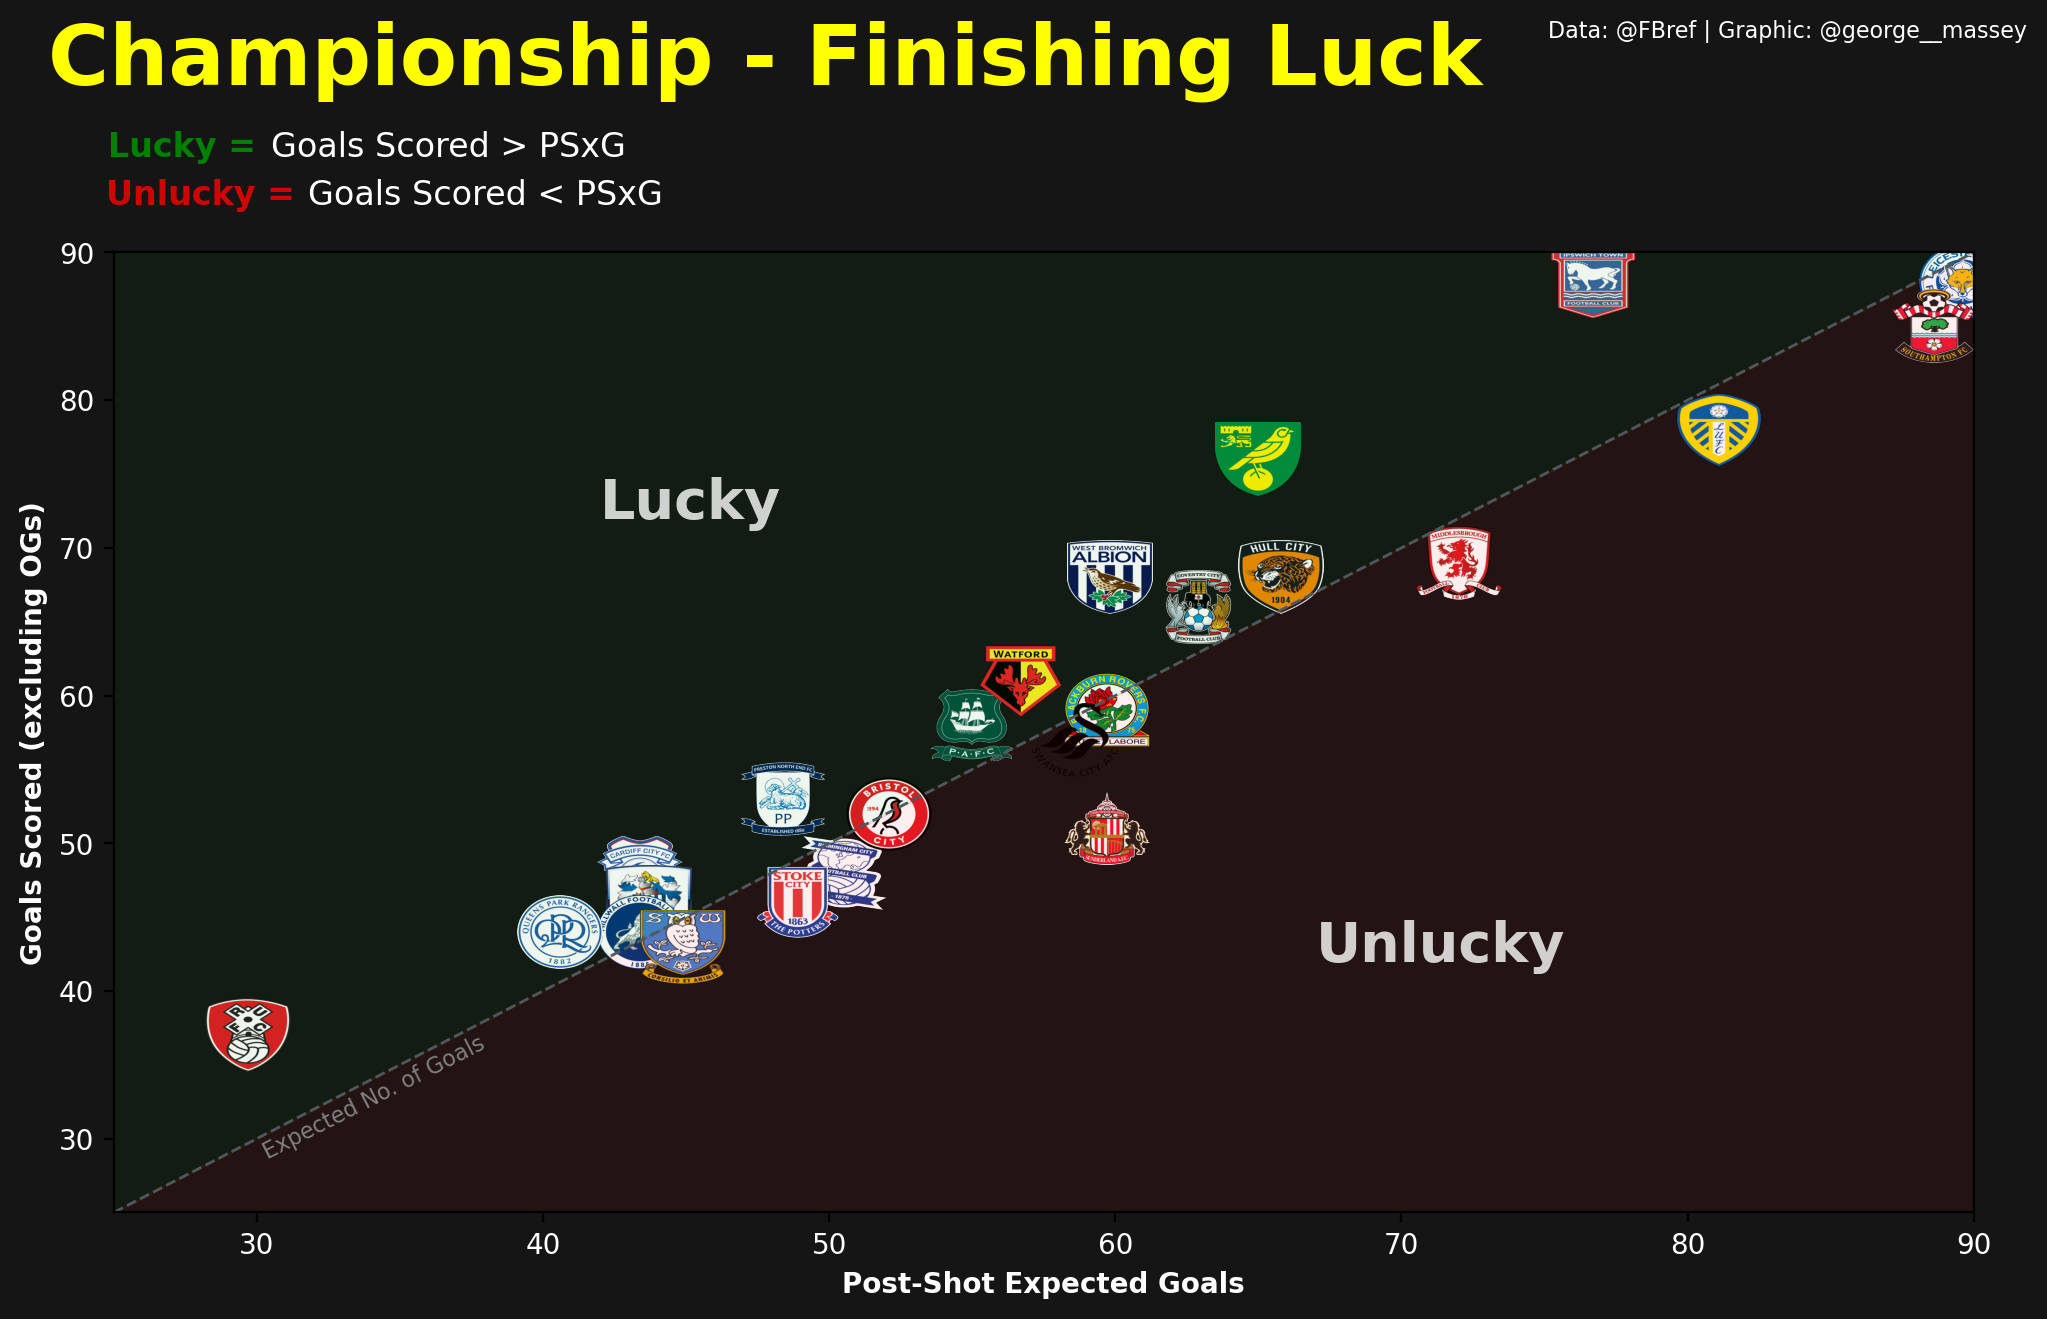

In [13]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(badge, extent=(team['PSxG']-1.5, team['PSxG']+1.5, team['Goals']-2.5, team['Goals']+2.5), aspect='auto', alpha=1)

plt.plot([25, 90], [25, 90], color='#4E585F', linestyle='--', linewidth=1)

# Add labels and title
plt.xlabel('Post-Shot Expected Goals', color='white',weight='bold')  # Set the xlabel color to white
plt.ylabel('Goals Scored (excluding OGs)', color='white',weight='bold')  # Set the ylabel color to white
plt.yticks([30,40,50,60,70,80,90],['30','40','50','60','70','80','90'], color='white')  # Set the yticks color to white
plt.xticks([30,40,50,60,70,80,90],['30','40','50','60','70','80','90'],color='white')  # Set the xticks color to white
plt.ylim(25,90)
plt.xlim(25,90)
# Fill the area below and above the dotted line (at y=40)
x = np.linspace(25, 90, 100)
y = x

# Fill the area above the diagonal line
plt.fill_between(x, y, 90, color='green', alpha=0.065)

# Fill the area below the diagonal line
plt.fill_between(x, y, 25, color='red', alpha=0.065)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

plt.text(42, 72, 'Lucky', color='white', fontsize=20, fontweight='bold', alpha=0.8)
plt.text(67, 42, 'Unlucky', color='white', fontsize=20, fontweight='bold', alpha=0.8)

plt.subplots_adjust(top=0.85, bottom=0.25)

# Add text outside of the plot
plt.text(0.35, 1.2, f'{league} - Finishing Luck', color='yellow', fontsize=30, weight='bold', ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.9, 1.23, 'Data: @FBref | Graphic: @george__massey', color='white', fontsize=8,ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.04, 1.11, 'Lucky = ', weight = 'bold', color='green', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.18, 1.11, 'Goals Scored > PSxG', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.05, 1.06, 'Unlucky = ', weight = 'bold', color='red', fontsize=12, ha='center', va='center',alpha=0.8,transform=plt.gca().transAxes)
plt.text(0.2, 1.06, 'Goals Scored < PSxG', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.14,0.12,'Expected No. of Goals',color='grey', fontsize=8, ha='center', va='center',transform=plt.gca().transAxes, rotation=27)
# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant


plt.show()